In [29]:
import pandas as pd
import glob
from matplotlib import pyplot as plt

In [30]:
glob.glob("../results/*/counts/alignment.sorted.filtered/counts.tsv")

['../results/N2_Input_Rep3_Rpph/counts/alignment.sorted.filtered/counts.tsv',
 '../results/N2_xf119_Rep2_Rpph/counts/alignment.sorted.filtered/counts.tsv',
 '../results/N2_Input_Rep1_Rpph/counts/alignment.sorted.filtered/counts.tsv',
 '../results/N2_xf119_Rep1_Rpph/counts/alignment.sorted.filtered/counts.tsv',
 '../results/N2_Input_Rep2_Rpph/counts/alignment.sorted.filtered/counts.tsv',
 '../results/N2_xf119_Rep3_Rpph/counts/alignment.sorted.filtered/counts.tsv']

In [31]:
miRNAs_path = "../../small_RNA_seq_15_C/results/annotation/mirnas.fa"
miRNAs = []
with open(miRNAs_path) as fp:
    for line in fp:
        if not line.startswith(">"):
            miRNAs.append(line.strip("\n"))

In [32]:
samples = ["N2_Input_Rep3_Rpph", "N2_xf119_Rep2_Rpph", "N2_Input_Rep1_Rpph", "N2_xf119_Rep1_Rpph", "N2_Input_Rep2_Rpph", "N2_xf119_Rep3_Rpph"]
order=["21U", "22G", "26G", "miRNA", "other"]

N2_Input_Rep3_Rpph


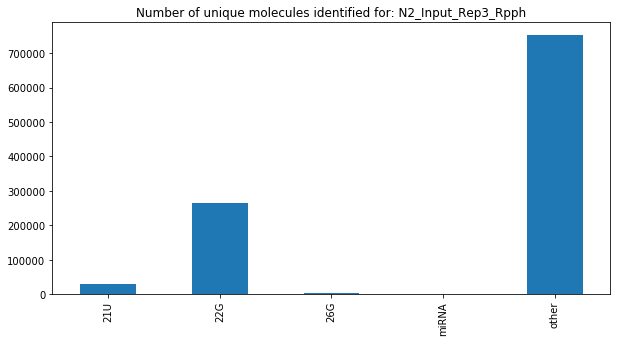

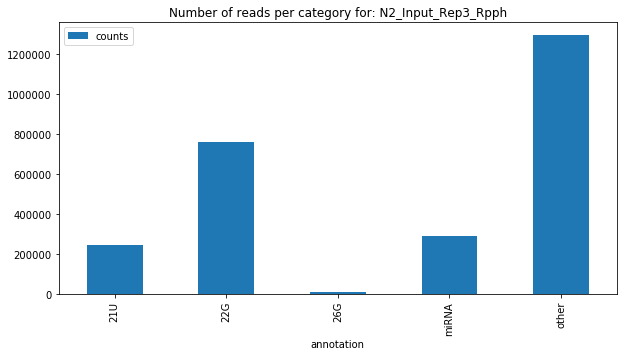

********************************************************************************
********************************************************************************
********************************************************************************
N2_xf119_Rep2_Rpph


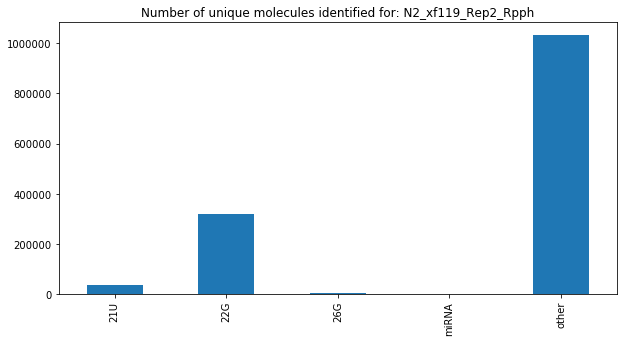

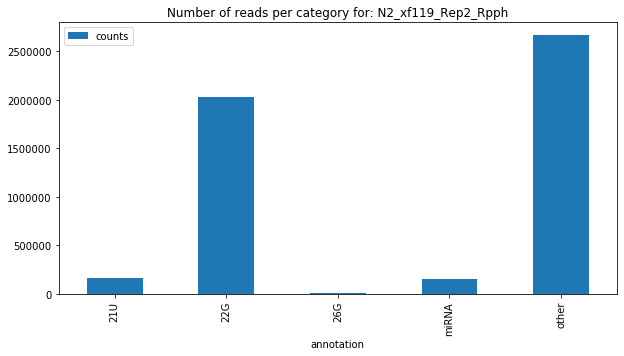

********************************************************************************
********************************************************************************
********************************************************************************
N2_Input_Rep1_Rpph


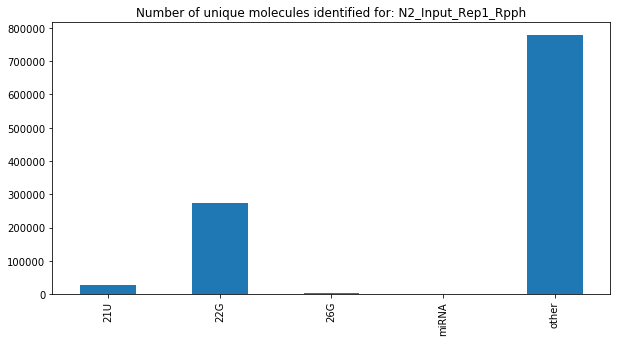

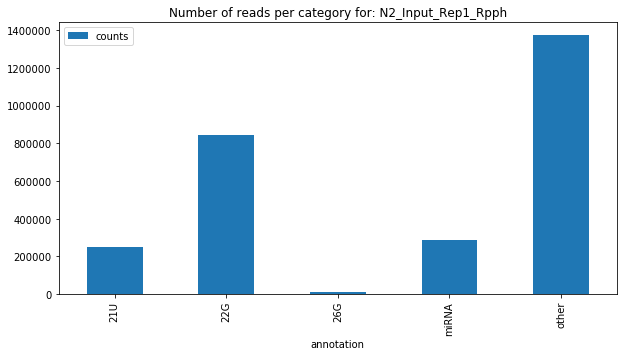

********************************************************************************
********************************************************************************
********************************************************************************
N2_xf119_Rep1_Rpph


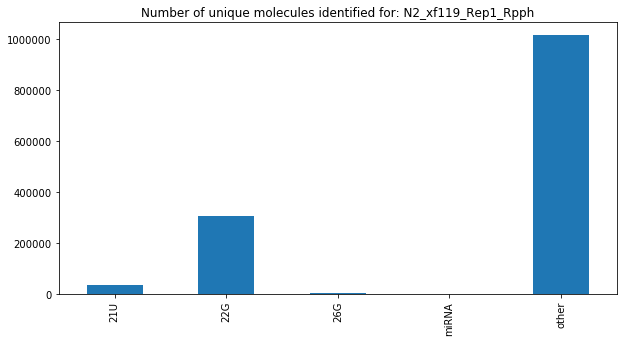

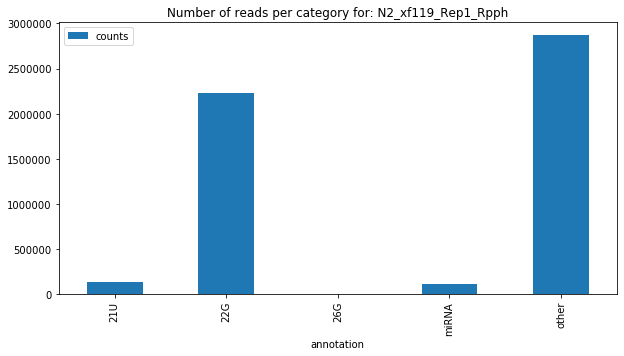

********************************************************************************
********************************************************************************
********************************************************************************
N2_Input_Rep2_Rpph


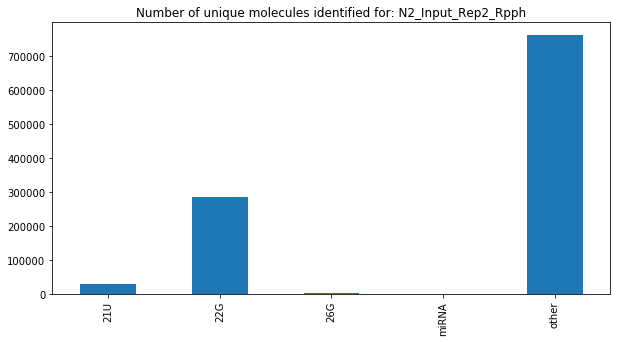

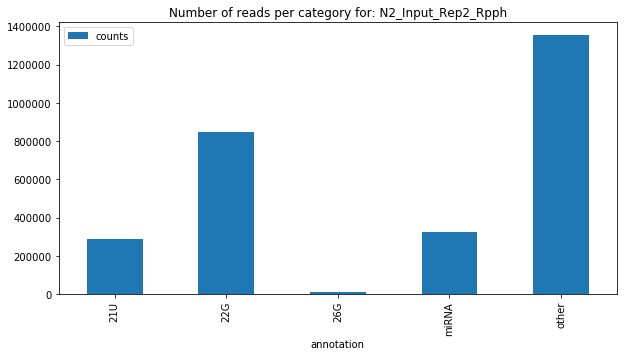

********************************************************************************
********************************************************************************
********************************************************************************
N2_xf119_Rep3_Rpph


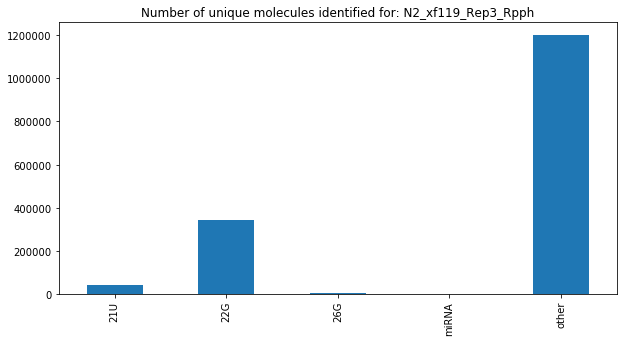

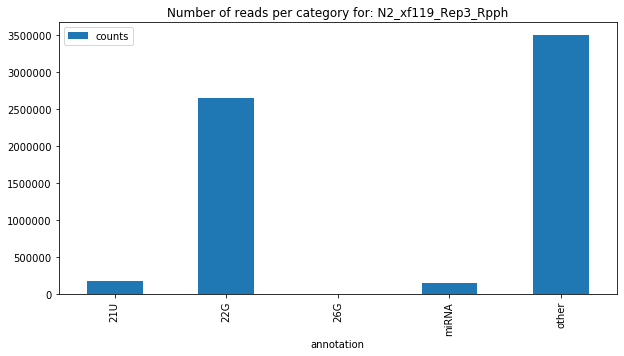

********************************************************************************
********************************************************************************
********************************************************************************


In [34]:
for sample in samples:
    print(f"{sample}")
    df = pd.read_csv(f"../results/{sample}/counts/alignment.sorted.filtered/counts.tsv", header=0, sep="\t")
    
    df["annotation"] = "other"
    df.loc[df["Name"].isin(miRNAs), "annotation"] = "miRNA"
    df.loc[(df["Name"].str.startswith("T")) & (df["Name"].str.len()==21) & (~df["Name"].isin(miRNAs)), "annotation"] = "21U"
    df.loc[(df["Name"].str.startswith("G")) & (df["Name"].str.len()==22) & (~df["Name"].isin(miRNAs)), "annotation"] = "22G"
    df.loc[(df["Name"].str.startswith("G")) & (df["Name"].str.len()==26) & (~df["Name"].isin(miRNAs)), "annotation"] = "26G"
    
    df.annotation.value_counts().reindex(order).plot(kind="bar", figsize=(10,5), title=f"Number of unique molecules identified for: {sample}")
    plt.show()
    df.groupby("annotation").sum().reindex(order).plot(kind="bar", figsize=(10,5), title=f"Number of reads per category for: {sample}")
    plt.show()
    print("*"*80)
    print("*"*80)
    print("*"*80)